# ETUDE DES IMAGES 

In [66]:
# biblio
# biblio
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import re


from PIL import Image
from IPython.display import Image as simg
!pip install opencv-python
import cv2 as cv

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import  manifold
from sklearn.pipeline import make_pipeline 
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras import backend as K

from keras.models import load_model
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D

## database 

In [4]:
# importer fichier
data=pd.read_csv('flipkart_com-ecommerce_sample_1050.csv',index_col='uniq_id')

In [5]:
path = r'C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flipkart/Images/'
list_photos = [data['image'][i] for i in range(data.shape[0])]
print(len(list_photos))

1050


In [6]:
list_photos

['55b85ea15a1536d46b7190ad6fff8ce7.jpg',
 '7b72c92c2f6c40268628ec5f14c6d590.jpg',
 '64d5d4a258243731dc7bbb1eef49ad74.jpg',
 'd4684dcdc759dd9cdf41504698d737d8.jpg',
 '6325b6870c54cd47be6ebfbffa620ec7.jpg',
 '893aa5ed55f7cff2eccea7758d7a86bd.jpg',
 'f355cc1ccb08bd0d283ed979b7ee7515.jpg',
 'dd0e3470a7e6ed76fd69c2da27721041.jpg',
 '41384da51732c0b4df3de8f395714fbb.jpg',
 '710ed5f2393a4b9e8823aa0029f71f93.jpg',
 '920154acbe49d3202ed7d2ed2df1ea13.jpg',
 '08452abdadb3db1e686b94a9c52fc7b6.jpg',
 '1e8741b5ae27a513546c94b3f3312aee.jpg',
 '189fa66a5fa6f08d2802a62ecf0be298.jpg',
 'bbb8cdc5406ff60ff06ff64630f2ca47.jpg',
 '1120bc768623572513df956172ffefeb.jpg',
 '5479bb7028827d60000720a2c135976a.jpg',
 '733aa1e801a139fa8dc7be9f0eff5ee0.jpg',
 '62c35de4df27437d3597963fac55a8b6.jpg',
 '33d97d63c037078cd3f08033966d6a88.jpg',
 'd7ca2b06b4f4d3b98c61c377b18a2d6b.jpg',
 'f74476ba64365d97a5be7d375cbf4c7a.jpg',
 'fda50982a672ef8835de5c1cc86f8bfc.jpg',
 '4788f5466992da09024b8ffcc8a5cba4.jpg',
 '653826cd53f1d9

In [7]:
# dimensions des images
height = []
width = []
for x in range(len(list_photos)):
    image = cv.imread(path+list_photos[x])
    height.append(image.shape[0])
    width.append(image.shape[1])
print(f"Hauteur maximum:{max(height)} ---- Largeur maximum: {max(width)}")
print(f"Hauteur minimum:{min(height)} ---- Largeur minimum: {min(width)}")

Hauteur maximum:11042 ---- Largeur maximum: 8484
Hauteur minimum:160 ---- Largeur minimum: 145


In [8]:
# liste des catégories
data['product_category_tree'] = data['product_category_tree'].apply(
    lambda x: re.split(' >>', x[2:]))
data['category'] = data['product_category_tree'].apply(lambda x: x[0])

In [9]:
list_cat = data["category"].value_counts().index.to_list()
list_cat

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

In [10]:
def resize_pad(image, size):
    """Fontion de resize des images à size*size avec padding"""
    import cv2
    
    if image.shape[0]>image.shape[1]:
        height = size
        width = int((height/image.shape[0])*image.shape[1])
        dsize = (width, height)
        image1 = cv2.resize(image, dsize)
        tp = 0
        bt = 0
        lft = int((size - image1.shape[1]))
        rgt = 0
        image2 = cv2.copyMakeBorder(image1,tp,bt,lft,rgt,
                                    cv2.BORDER_CONSTANT,value=[255, 255, 255])
    elif image.shape[0]<image.shape[1]:
        width = size
        height = int((width/image.shape[1])*image.shape[0])
        dsize = (width, height)
        image1 = cv2.resize(image, dsize)
        tp = int((size - image1.shape[0]))
        bt = 0
        lft = 0
        rgt = 0
        image2 = cv2.copyMakeBorder(image1,tp,bt,lft,rgt,
                                    cv2.BORDER_CONSTANT,value=[255, 255, 255])
    elif image.shape[0]==image.shape[1]:
        width = size
        height = int((width/image.shape[1])*image.shape[0])
        dsize = (width, height)
        image1 = cv2.resize(image, dsize)
        tp = 0
        bt = 0
        lft = 0
        rgt = 0
        image2 = cv2.copyMakeBorder(image1,tp,bt,lft,rgt,
                                    cv2.BORDER_CONSTANT,value=[255, 255, 255])
    return image2

## 2- Preprocessing

#### 2-1 Nous allons regarder chaque procede sur une image test

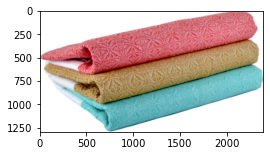

In [11]:
img_test = cv.imread(path + '7b72c92c2f6c40268628ec5f14c6d590.jpg')
fig = plt.figure(figsize=(4,4))
plt.imshow(img_test[:,:,::-1])

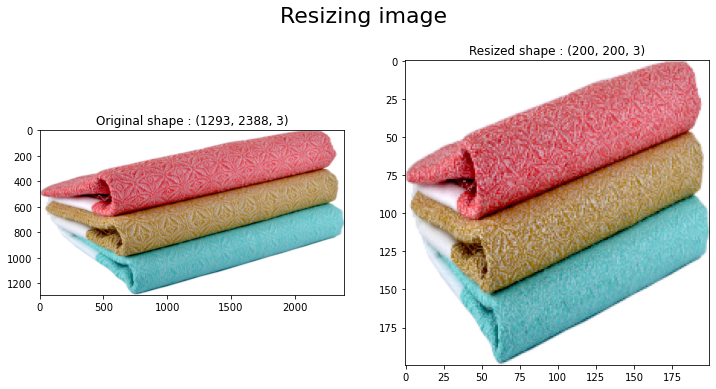

In [12]:
#modification taille image

height = 200
width = 200
dim = (width, height)
# resize image with OpenCV
res_img = cv.resize(img_test, dim, interpolation=cv.INTER_LINEAR)

# Show both img
fig = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img_test[:,:,::-1])
plt.title("Original shape : {}".format(img_test.shape))
plt.subplot(1, 2, 2)
plt.imshow(res_img[:,:,::-1])
plt.title("Resized shape : {}".format(res_img.shape))
plt.suptitle("Resizing image",
             color="black", 
             fontsize=22, y=.98)
plt.show()

In [13]:
# Egalisation des images

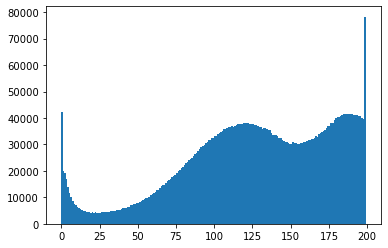

In [14]:
# Charger l'image comme matrice de pixels
img_test = cv.imread(path + '7b72c92c2f6c40268628ec5f14c6d590.jpg')

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_test.flatten(), bins=range(200))
plt.show()

In [15]:
# Transform image avec d'autres couleurs
img_RGB = cv.cvtColor(img_test, cv.COLOR_BGR2RGB)
img_YUV = cv.cvtColor(img_test,cv.COLOR_BGR2YUV)

In [16]:
def plot_histogram(init_img, convert_img):
    """Display the initial
    and converted images according to a certain
    colorimetric format as well as the histogram
    of the latter. 
    Args :
    init_img : list
        init_img[0] = Title of the init image
        init_img[1] = Init openCV image
    convert_img : list
        convert_img[0] = Title of the converted
        convert_img[1] = converted openCV image
    """
    hist, bins = np.histogram(
                    convert_img[1].flatten(),
                    256, [0,256])
    # Cumulative Distribution Function
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    # Plot histogram
    fig = plt.figure(figsize=(25,6))
    plt.subplot(1, 3, 1)
    plt.imshow(init_img[1])
    plt.title("{} Image".format(init_img[0]), 
              color="#343434")
    plt.subplot(1, 3, 2)
    plt.imshow(convert_img[1])
    plt.title("{} Image".format(convert_img[0]), 
              color="#343434")
    plt.subplot(1, 3, 3)
    plt.plot(cdf_normalized, 
             color='r', alpha=.7,
             linestyle='--')
    plt.hist(convert_img[1].flatten(),256,[0,256])
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title("Histogram of convert image", color="#343434")
    plt.suptitle("Histogram and cumulative "\
                 "distribution for test image",
              color="black", fontsize=22, y=.98)
    plt.show()

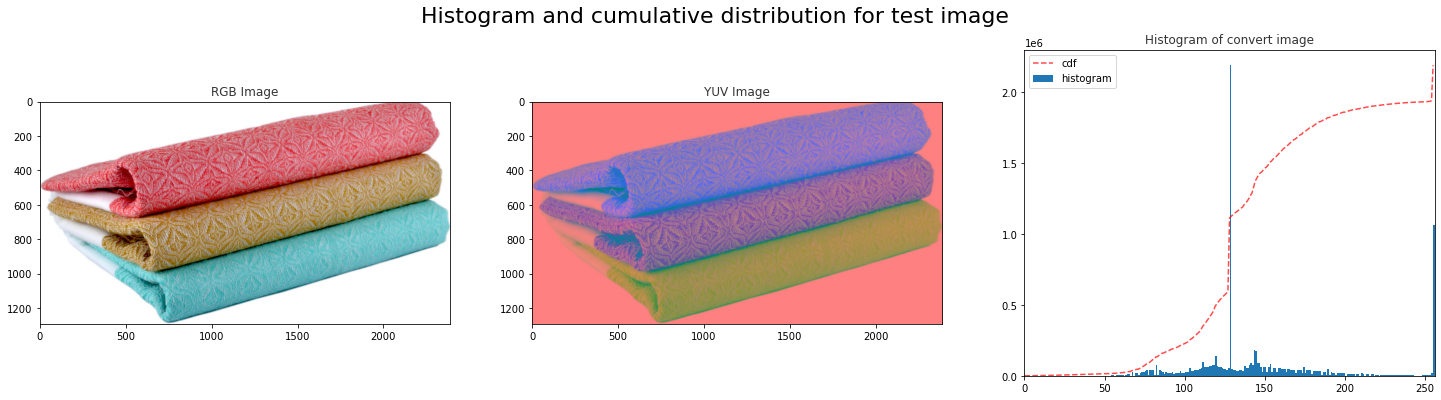

In [17]:
plot_histogram(["RGB", img_RGB], ["YUV", img_YUV])

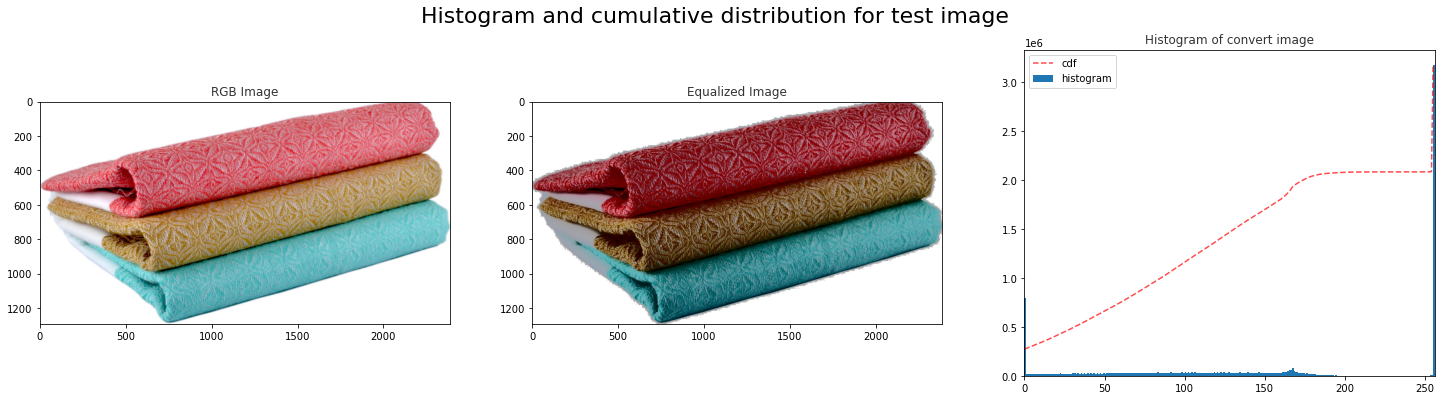

In [18]:
# Egalisation 
img_YUV[:,:,0] = cv.equalizeHist(img_YUV[:,:,0])
img_equ = cv.cvtColor(img_YUV, cv.COLOR_YUV2RGB)
plot_histogram(["RGB", img_RGB], ["Equalized", img_equ])

In [19]:
# Filtre 

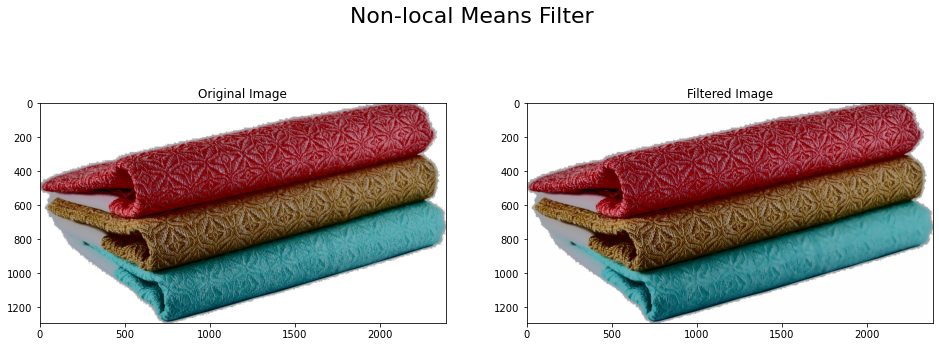

In [20]:
# Apply non-local means filter on test img
dst_img = cv.fastNlMeansDenoisingColored(
    src=img_equ,
    dst=None,
    h=10,
    hColor=10,
    templateWindowSize=7,
    searchWindowSize=21)

# Show both img
fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.imshow(img_equ)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(dst_img)
plt.title("Filtered Image")
plt.suptitle("Non-local Means Filter",
             color="black", 
             fontsize=22, y=.98)
plt.show()

##  Application preprocessing à toutes les images

Image brut


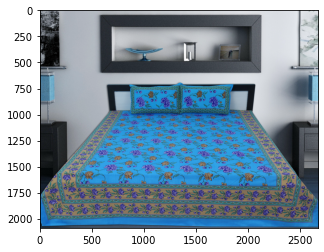

In [21]:
sift = cv.SIFT_create()
image = cv.imread(path+list_photos[4])
print('Image brut')
plt.imshow(image)
plt.show()

Image gris


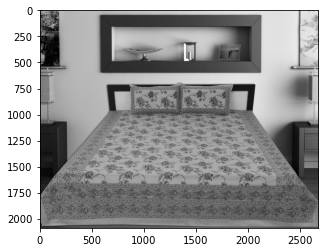

In [22]:
# convert in gray
image = cv.imread(path+list_photos[4], 0) 
print('Image gris')
plt.imshow(image, cmap='gray')
plt.show()

Image nouvelle taille avec padding


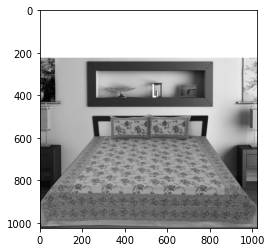

In [23]:
# resize
image = resize_pad(image, 1024)
print('Image nouvelle taille avec padding')
plt.imshow(image, cmap='gray')
plt.show()

Egalisation des histogrammes


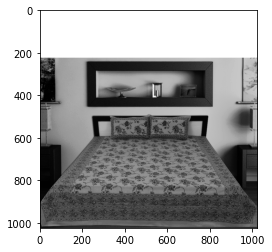

In [24]:
# equalize image histogram
image = cv.equalizeHist(image)   
print('Egalisation des histogrammes')
plt.imshow(image, cmap='gray')
plt.show()

Contraste adapté et egalisation des histogrammes


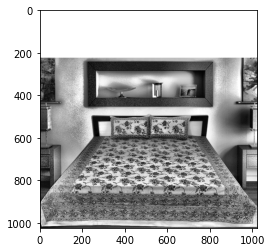

In [25]:
# Equalization by CLAHE
clahe = cv.createCLAHE()          
image = clahe.apply(image)
print('Contraste adapté et egalisation des histogrammes')
plt.imshow(image, cmap='gray')
plt.show()

Image prétraitée et descripteurs


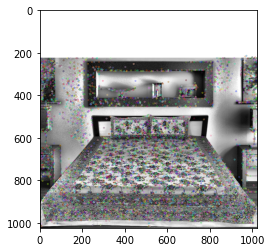

Descripteurs :  (6720, 128)

[[ 17.   5.  10. ...   0.   0.   0.]
 [ 12. 102.  43. ...   0.  18.  95.]
 [  1.   0.   0. ...  77.   5.   9.]
 ...
 [  0.   0.   0. ...   0.   1.   1.]
 [ 54. 131.  60. ...   0.   0.   1.]
 [136. 134.   7. ...   0.   0.   0.]]


In [26]:
# generation SIFT descripteurs
kp, des = sift.detectAndCompute(image, None)
img=cv.drawKeypoints(image,kp,image)
print('Image prétraitée et descripteurs')
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

#### Création des descripteurs de chaque image

In [27]:
# identification of key points and associated descriptors
import time
sift_keypoints = []
temps1=time.time()
sift = cv.SIFT_create()
clahe = cv.createCLAHE()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv.imread(path+list_photos[image_num],0) # convert in gray
    image = resize_pad(image, 1024)
    
    res = clahe.apply(image)
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints, dtype='object')
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (6453749, 128)
temps de traitement SIFT descriptor :           448.16 secondes


#### creation de cluster des descripteurs

In [28]:
# Determination number of clusters
from sklearn import cluster
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k,
                                 batch_size=2000, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  2540
Création de 2540 clusters de descripteurs ...
temps de traitement kmeans :           305.52 secondes


#### creation des features des images 

In [29]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features_sift = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           219.42 secondes


#### Reduction de dimension

In [267]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features_sift.shape)
pca = decomposition.PCA(n_components=0.95)
feat_pca= pca.fit_transform(im_features_sift)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 2540)
Dimensions dataset après réduction PCA :  (1050, 454)


#### Réduction de dimension T-SNE

In [268]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30,
                     random_state=6)
X_tsne_sift = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne_sift[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["category"]
print(df_tsne.shape)

C:\Users\mehan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mehan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


In [269]:
from sklearn import cluster, metrics

km = cluster.KMeans(n_clusters=7, random_state=6)
km.fit(X_tsne_sift)
tsne_result=km.fit(X_tsne_sift)

df_tsne["cluster"] = km.labels_
print(df_tsne.shape)

(1050, 4)


In [270]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score


labels = data["category"]
ARI = adjusted_rand_score(labels, km.labels_)
sil_score = silhouette_score(X_tsne_sift, km.labels_)
print(f"sil score = {sil_score} --- ARI = {ARI}")

sil score = 0.34608495235443115 --- ARI = 0.029755568612160135


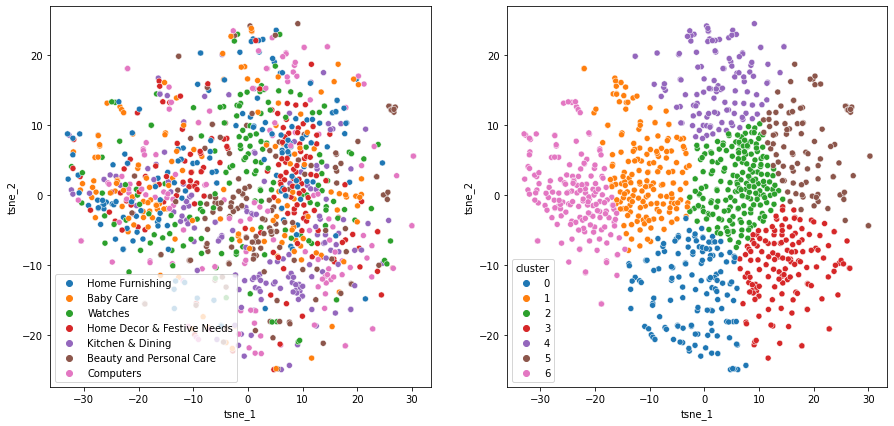

In [271]:
# Plot des samples dans t-SNE plot
df_tsne['tsne_1'] = X_tsne_sift[:, 0]
df_tsne['tsne_2'] = X_tsne_sift[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
labels_true = data['category'].values
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue=labels_true,
                       palette='tab10',
                       data=df_tsne,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='cluster',
                       palette='tab10',
                       data=df_tsne,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.savefig("sift_tsne.png", bbox_inches="tight")
plt.show()

In [272]:
def clusters_scores(X,labels1, labels2, name_col):
    '''Return a dataframe of clustering scores :
    Homogeneity, Completeness, V-measure, ARI
    Args:
    'labels1 : list
    labels2 : list
    name_col : string
    '''
    homo = metrics.homogeneity_score(labels1, labels2)
    comp = metrics.completeness_score(labels1, labels2)
    v_mea = metrics.v_measure_score(labels1, labels2)
    ari = metrics.adjusted_rand_score(labels1, labels2)
    sil=silhouette_score(X,km.labels_,metric="euclidean")
    return  pd.DataFrame({name_col: [homo,
                              comp,
                              v_mea,
                              ari,sil]},
                              index=['Homogeneity',
                                     'Completeness',
                                     'V_measure','ARI','sil_scor'],
                              dtype='float64')

In [273]:
sift_cluster=clusters_scores(X_tsne_sift,labels,km.labels_,'SIFT_cluster')

In [274]:
df_tsne["class"] = labels_true
df_tsne.groupby('cluster')['class'].value_counts().to_frame()

class
cluster class                            
0       Beauty and Personal Care       35
        Kitchen & Dining               35
        Computers                      22
        Watches                        15
        Baby Care                      14
        Home Furnishing                10
        Home Decor & Festive Needs      9
1       Home Decor & Festive Needs     36
        Kitchen & Dining               26
        Watches                        24
        Baby Care                      23
        Computers                      22
        Beauty and Personal Care       21
        Home Furnishing                21
2       Home Decor & Festive Needs     47
        Beauty and Personal Care       39
        Watches                        31
        Home Furnishing                28
        Baby Care                      22
        Kitchen & Dining               16
        Computers                      11
3       Kitchen & Dining               45
        Computers                      32
        Home Decor & Festive Needs     22
        Beauty and Personal Care       16
        Watches                        14
        Baby Care                      13
        Home Furnishing                 5
4       Watches                        29
        Home Furnishing                26
        Computers                      23
        Baby Care                      15
        Home Decor & Festive Needs     11
        Beauty and Personal Care       10
        Kitchen & Dining                7
5       Beauty and Personal Care       21
        Home Furnishing                18
        Baby Care                      16
        Computers                      14
        Watches                        14
        Kitchen & Dining                9
        Home Decor & Festive Needs      7
6       Baby Care                      47
        Home Furnishing                42
        Computers                      26
        Watches                        23
        Home Decor & Festive Needs     18
        Kitchen & Dining               12
        Beauty and Personal Care        8

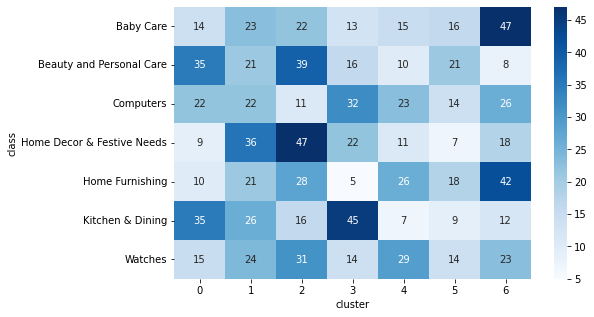

In [38]:
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(df_tsne['class'], df_tsne['cluster']),
            annot=True,
            cmap="Blues")
plt.show()

### Pré-traitement des images via ORB

In [39]:
# identification of key points and associated descriptors

orb_keypoints = []

orb = cv.ORB_create()
clahe = cv.createCLAHE()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv.imread(path+list_photos[image_num],0) # convert in gray
    image = resize_pad(image, 1024)
    
    res = clahe.apply(image)
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints, dtype='object')
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (524479, 32)
temps de traitement ORB descriptor :            42.60 secondes


#### Création des clusters de descripteurs
Utilisation de MiniBatchKMeans 

In [278]:
# Determination number of clusters
#(vaut mieux y mettre une hypothèse sur la base de l'article (variance de la pca))
k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
km = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k,
                                 batch_size=2000, random_state=0)
km.fit(orb_keypoints_all)

print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  724
Création de 724 clusters de descripteurs ...
temps de traitement kmeans :           150.98 secondes


#### Création des features des images

In [41]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = km.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features_orb = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           150.98 secondes


#### Reduction de dimension PCA

In [259]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features_orb.shape)
pca = decomposition.PCA(n_components=0.95)
feat_pca= pca.fit_transform(im_features_orb)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 2540)
Dimensions dataset après réduction PCA :  (1050, 455)


#### Réduction de dimension T-SNE

In [260]:
tsne = manifold.TSNE(n_components=2, perplexity=30,
                     random_state=6)
X_tsne_orb = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne_orb[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["category"]
print(df_tsne.shape)

C:\Users\mehan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mehan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


In [261]:
km = cluster.KMeans(n_clusters=7, random_state=6)
km.fit(X_tsne_orb)

df_tsne["cluster"] = km.labels_
print(df_tsne.shape)

(1050, 4)


In [262]:
labels = data["category"]
ARI = adjusted_rand_score(labels, km.labels_)
sil_score = silhouette_score(X_tsne_orb, km.labels_)
print(f"sil score = {sil_score} --- ARI = {ARI}")

sil score = 0.3369346857070923 --- ARI = 0.02497825618297731


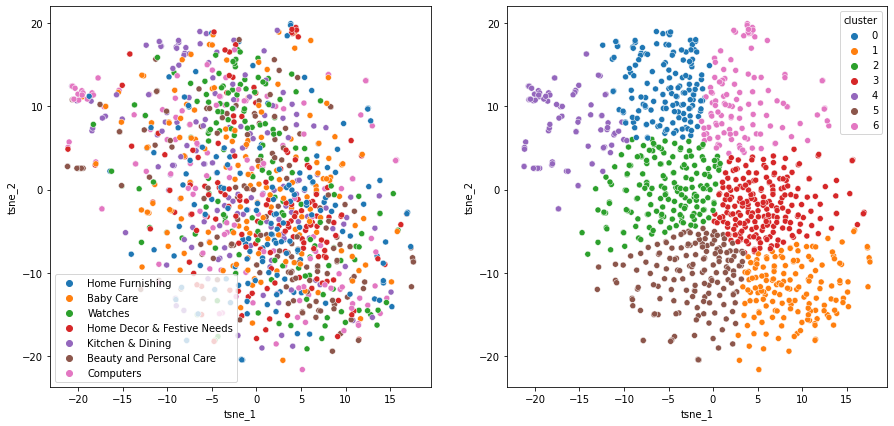

In [263]:
# Plot des samples dans t-SNE plot
df_tsne['tsne_1'] = X_tsne_orb[:, 0]
df_tsne['tsne_2'] = X_tsne_orb[:, 1]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
labels_true = data['category'].values
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue=labels_true,
                       palette='tab10',
                       data=df_tsne,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne_1",
                       y="tsne_2",
                       hue='cluster',
                       palette='tab10',
                       data=df_tsne,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.savefig("ORB_tsne.png", bbox_inches="tight")
plt.show()

In [47]:
orb_cluster=clusters_scores(X_tsne_orb,labels,km.labels_,'ORB_cluster')

In [266]:
df_tsne["class"] = labels_true
df_tsne.groupby('cluster')['class'].value_counts().to_frame()

class
cluster class                            
0       Watches                        40
        Kitchen & Dining               36
        Baby Care                      20
        Computers                      18
        Beauty and Personal Care       16
        Home Decor & Festive Needs     10
        Home Furnishing                 9
1       Beauty and Personal Care       48
        Watches                        27
        Computers                      26
        Home Decor & Festive Needs     18
        Home Furnishing                17
        Baby Care                      14
        Kitchen & Dining                9
2       Baby Care                      32
        Home Decor & Festive Needs     31
        Kitchen & Dining               28
        Computers                      22
        Home Furnishing                22
        Watches                        20
        Beauty and Personal Care       12
3       Home Decor & Festive Needs     47
        Home Furnishing                46
        Baby Care                      36
        Kitchen & Dining               27
        Computers                      20
        Watches                        20
        Beauty and Personal Care       18
4       Computers                      34
        Beauty and Personal Care       19
        Kitchen & Dining               13
        Baby Care                      10
        Home Decor & Festive Needs      7
        Home Furnishing                 5
        Watches                         5
5       Home Furnishing                38
        Home Decor & Festive Needs     25
        Baby Care                      21
        Kitchen & Dining               20
        Beauty and Personal Care       19
        Computers                      16
        Watches                        15
6       Watches                        23
        Beauty and Personal Care       18
        Baby Care                      17
        Kitchen & Dining               17
        Computers                      14
        Home Furnishing                13
        Home Decor & Festive Needs     12

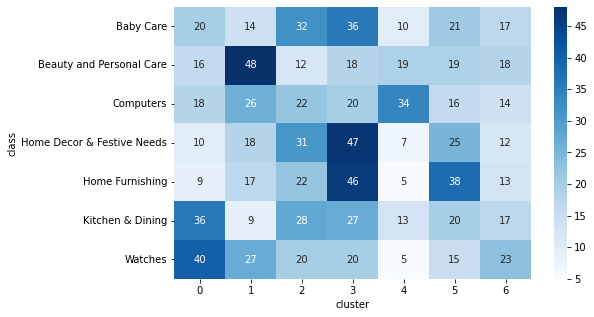

In [49]:
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(df_tsne['class'], df_tsne['cluster']),
            annot=True,
            cmap="Blues")
plt.show()

## Les algorithmes de type CNN par le Transfer Learning

### Préparation dataframe de travail

In [50]:
# Ajout variable image_loc
path = r'C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flipkart/Images/'
data['image_loc'] = [path + row for row in data['image']]

Pour effectuer la classification des catégories en fonction des images, nous garderons :
[x] image : le nom de l'image,
[x] image_loc : le nom de l'image avec sa localisation dans le répertoire de stockage des images,
[x] Categorie_1 : la première sous-catégorie.

In [51]:
#Dataframe de travail pour le traitement des images
df= data[['image', 'image_loc', 'category', ]]

In [52]:
df.head(2)

,image,image_loc,category
uniq_id,,,
55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Home Furnishing
7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Baby Care


### Transfer learning --> utilisation VGG16 pré entrainé

In [53]:
#Utilisation de VGG16 pré-entraîné sur ImageNet avec les images d'origine
# VGG16 imports
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array

# Liste
vgg16_all_features = []

# Instanciation du modèle
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Résumé de l'architecture du modèle
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:
 # Charger l'image et la redimensionner à la taille requise de 224×224 pixels.
for pict in df['image_loc']:
    img = keras.preprocessing.image.load_img(pict, target_size=(224, 224))
    img = img_to_array(img)  # Convertir en tableau numpy
    img = np.expand_dims(img, axis=0) # redimensionnement
    img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
    #Nous pouvons maintenant donner l'image en entrée du réseau et prédire sa classe 
    y = model_vgg16.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
    #Ajouter la feature prédite en nparray à la liste
    vgg16_all_features.append(np.array(y).flatten())
    
vgg16_all_features = np.array(vgg16_all_features)

C:\Users\mehan\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [55]:
# Association des features à chaque image
df['vgg16_bovw'] = [vgg16_all_features[i] for i in range(df.shape[0])]


C:\Users\mehan\AppData\Local\Temp\ipykernel_11464\3813848276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vgg16_bovw'] = [vgg16_all_features[i] for i in range(df.shape[0])]


In [56]:
# Dataframe de travail
df_vgg16_bovw = df[['image', 'image_loc', 'category', 'vgg16_bovw']]
# Constituer le dataframe de vecteurs de BOVW VGG16
df_vgg16_vectors = pd.DataFrame.from_records(vgg16_all_features)

In [57]:
df_vgg16_bovw

,image,image_loc,category,vgg16_bovw
uniq_id,,,,
55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 11.387655, 0.0, 0.0, 0.0,..."
7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc,958f54f4c46b53c8a0a9b8167d9140bc.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 69.73755, 0.0, ..."
fd6cbcc22efb6b761bd564c28928483c,fd6cbcc22efb6b761bd564c28928483c.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5912e037d12774bb73a2048f35a00009,5912e037d12774bb73a2048f35a00009.jpg,C:/Users/mehan/Desktop/DATA SCIENTIST/P06/Flip...,Baby Care,"[1.4419246, 50.186295, 0.0, 0.0, 0.0, 3.403961..."


### reduction de dimension

In [ ]:
# pca (avec n composantes avec var expliquée =95%)
# km(feat_pca) c'est mieux 
# visu avec TSNE 

In [498]:
print("Dimensions dataset avant réduction PCA : ", df_vgg16_vectors.shape)
pca = decomposition.PCA(n_components=0.95)
feat_pca= pca.fit_transform(df_vgg16_vectors)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 25088)
Dimensions dataset après réduction PCA :  (1050, 745)


In [499]:
tsne_vgg16 = manifold.TSNE(verbose=1, perplexity=30, n_iter=5000)
X_proj_tsne_vgg16 =tsne_vgg16.fit_transform(feat_pca)
# Dataframe pour clustering
df_tsne_vgg16 = pd.DataFrame({'tsne1' : X_proj_tsne_vgg16[:, 0],
                              'tsne2' : X_proj_tsne_vgg16[:, 1],
                              'category' : df_vgg16_bovw['category'],
                              'image': df_vgg16_bovw['image'],
                              'image_loc': df_vgg16_bovw['image_loc']})

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.004s...
[t-SNE] Computed neighbors for 1050 samples in 0.132s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 451.308700
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.906952
[t-SNE] KL divergence after 4300 iterations: 1.739739


In [500]:
# clustering
km= KMeans(n_clusters=7, init='k-means++',
                           n_init=10).fit(df_tsne_vgg16[['tsne1','tsne2']])


In [501]:
# Ajout de l'assignation du cluster au dataframe
df_tsne_vgg16['clusters'] = km.labels_
kmeans_tsne_vgg16_labels = km.labels_

In [502]:

true_labels = df_tsne_vgg16["category"]
ARI = adjusted_rand_score(true_labels, kmeans_tsne_vgg16_labels)
sil_score = silhouette_score(X_proj_tsne_vgg16, kmeans_tsne_vgg16_labels)
print(f"sil score = {sil_score} --- ARI = {ARI}")

sil score = 0.40653932094573975 --- ARI = 0.2878590827925556


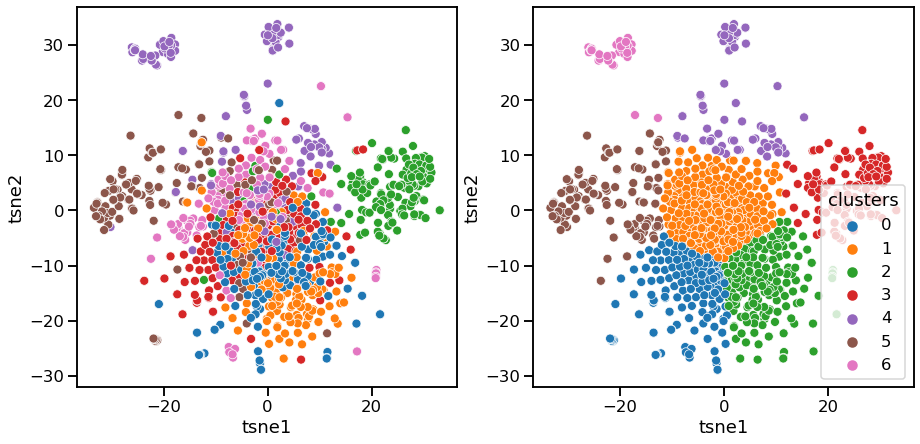

In [504]:
# Plot des samples dans t-SNE plot
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plot = sns.scatterplot(x="tsne1",
                       y="tsne2",
                       hue=true_labels,
                       palette='tab10',
                       data=df_tsne_vgg16,
                       legend=False)
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.subplot(1, 2, 2)
plot = sns.scatterplot(x="tsne1",
                       y="tsne2",
                       hue='clusters',
                       palette='tab10',
                       data=df_tsne_vgg16,
                       legend="full")
#plt.xlim([-100, 60])
#plt.ylim([-60, 100])
plt.savefig("VGG16_tsne.png", bbox_inches="tight")
plt.show()

In [505]:
VGG16_cluster=clusters_scores(X_proj_tsne_vgg16,kmeans_tsne_vgg16_labels,true_labels,'VGG16_Clusters')

In [238]:
df_tsne_vgg16.groupby('clusters')['category'].value_counts().to_frame()

category
clusters category                            
0        Beauty and Personal Care          99
         Kitchen & Dining                  14
         Home Decor & Festive Needs         8
         Baby Care                          2
1        Watches                          138
         Computers                         10
         Home Decor & Festive Needs         2
2        Computers                         95
         Home Decor & Festive Needs        90
         Baby Care                         31
         Beauty and Personal Care          30
         Kitchen & Dining                  28
         Home Furnishing                   25
         Watches                            8
3        Home Furnishing                   50
         Baby Care                         48
         Home Decor & Festive Needs        29
         Computers                          9
         Beauty and Personal Care           3
         Kitchen & Dining                   2
         Watches                            1
4        Home Furnishing                   73
         Baby Care                         68
         Home Decor & Festive Needs        16
         Beauty and Personal Care          15
         Computers                         10
5        Kitchen & Dining                  65
         Computers                         26
         Home Decor & Festive Needs         5
         Beauty and Personal Care           3
         Watches                            3
         Baby Care                          1
6        Kitchen & Dining                  41
         Home Furnishing                    2

In [276]:
#Catégories des différents clusters + Matrice de confusion
df_tsne_vgg16['cluster_label'] = df_tsne_vgg16['clusters']
df_tsne_vgg16['cluster_label'] = df_tsne_vgg16['cluster_label'].replace(0, 'Beauty and Personal Care')
df_tsne_vgg16['cluster_label'] = df_tsne_vgg16['cluster_label'].replace(1, 'watches')
df_tsne_vgg16['cluster_label'] = df_tsne_vgg16['cluster_label'].replace(2, 'Home decor & Festive Needs')
df_tsne_vgg16['cluster_label'] = df_tsne_vgg16['cluster_label'].replace(3, 'Home furnishing')
df_tsne_vgg16['cluster_label'] = df_tsne_vgg16['cluster_label'].replace(4, 'Baby Care')
df_tsne_vgg16['cluster_label'] = df_tsne_vgg16['cluster_label'].replace(5, 'Kitching & dinning')
df_tsne_vgg16['cluster_label'] = df_tsne_vgg16['cluster_label'].replace(6, 'computers')
categories_predict = df_tsne_vgg16['cluster_label']
categories_true = df_tsne_vgg16['category']
print('\naccuracy: {}%'.format(round(accuracy_score(categories_predict,categories_true)*100,2)))



accuracy: 15.9%


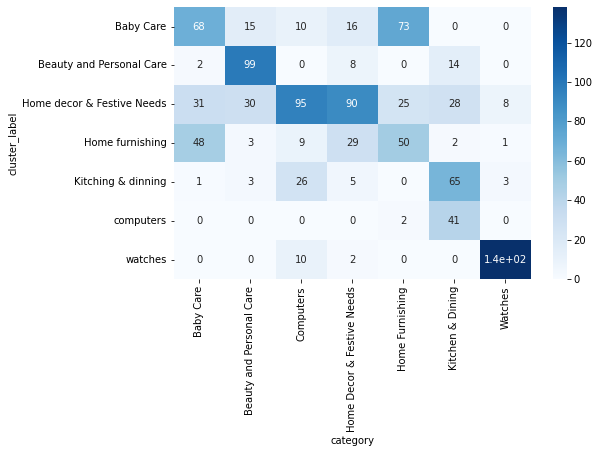

In [277]:
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(categories_predict,categories_true),
            annot=True,
            cmap="Blues")
plt.show()

In [248]:
compare_km = pd.concat([sift_cluster, orb_cluster], axis=1)
compare_km = pd.concat([compare_km, VGG16_cluster], axis=1)

In [249]:
img_km=compare_km.T.sort_values(by='ARI', ascending=False)

In [250]:
img_km

,Homogeneity,Completeness,V_measure,ARI,sil_scor
VGG16_Clusters,0.438294,0.410314,0.423842,0.293455,0.412330
SIFT_cluster,0.053119,0.053722,0.053419,0.029756,0.346085
ORB_cluster,0.045464,0.046154,0.045806,0.024978,0.336935


In [251]:
text_km=pd.read_csv('compare.csv',index_col=[0])

In [252]:
text_km

,Homogeneity,Completeness,V_measure,ARI,sil_scor
svd_tf_Kmeans,0.320497,0.193321,0.241170,0.071505,-0.191498
svd_tfidf_Kmeans,0.485696,0.407960,0.443447,0.194402,0.026700
tsne_tf_Kmeans,0.475388,0.465171,0.470224,0.357502,0.455265
tsne_tfidf_Kmeans,0.521351,0.511856,0.516560,0.407434,0.463916
svd_bert_Kmeans,0.441250,0.402347,0.420902,0.237345,0.230811
tsne_bert_Kmeans,0.437335,0.418656,0.427792,0.261455,0.445599
svd_bert_Kmeans,0.437335,0.418656,0.427792,0.261455,0.286302
tsne_use_Kmeans,0.563576,0.555964,0.559744,0.446889,0.461946
lda_tf_Kmeans,0.268048,0.221924,0.242815,0.138938,-0.065553
lda_tfidf_Kmeans,0.189820,0.110981,0.140069,0.076113,-0.015467


In [253]:
scor_fin=pd.concat([text_km,img_km],axis=0)

In [254]:
scor_fin.sort_values(by='ARI', ascending=False)

,Homogeneity,Completeness,V_measure,ARI,sil_scor
tsne_use_Kmeans,0.563576,0.555964,0.559744,0.446889,0.461946
tsne_tfidf_Kmeans,0.521351,0.511856,0.516560,0.407434,0.463916
tsne_tf_Kmeans,0.475388,0.465171,0.470224,0.357502,0.455265
VGG16_Clusters,0.438294,0.410314,0.423842,0.293455,0.412330
tsne_bert_Kmeans,0.437335,0.418656,0.427792,0.261455,0.445599
svd_bert_Kmeans,0.437335,0.418656,0.427792,0.261455,0.286302
svd_bert_Kmeans,0.441250,0.402347,0.420902,0.237345,0.230811
nmf_tf_Kmeans,0.493339,0.364508,0.419249,0.201058,0.002471
svd_tfidf_Kmeans,0.485696,0.407960,0.443447,0.194402,0.026700
w2v_Kmeans,0.312164,0.292275,0.301892,0.192983,0.502902


In [255]:
scor_fin_sort=scor_fin.sort_values(by='ARI', ascending=False)

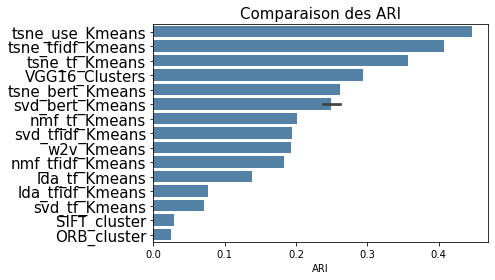

In [256]:
sns.barplot(x=scor_fin_sort['ARI'],y=scor_fin_sort.index, color='SteelBlue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.title('Comparaison des ARI', fontsize=15)
plt.show()

In [131]:
df_txt=pd.read_csv('data_clean.csv')

In [132]:
df_txt.columns

Index(['Unnamed: 0', 'product_name', 'image', 'product_category_tree',
       'cat_lvl_1', 'description', 'descriptif', 'descriptif_cleaned',
       'descriptif_final', 'topic', 'topic_tfi', 'topic_nmf_tfidf',
       'topic_nmf_tf', 'predicted_category_bow', 'predicted_category_tf',
       'predicted_category_tfidf', 'predicted_category_bert',
       'predicted_category_use', 'predicted_category_lda_tf',
       'predicted_category_lda_tfidf', 'predicted_category_nmf_tf',
       'predicted_category_nmf_tfidf', 'predicted_category_w2v'],
      dtype='object')

### ESSAI : Combinaisons données textuelles + données visuelles

In [174]:
df_use=pd.read_csv('df_use.csv',index_col=[0])

In [175]:
tsne = manifold.TSNE(n_components=2, verbose=0, perplexity=80, n_iter=5000, learning_rate=200)
df1_tsne = tsne.fit_transform(df_use)
tsne_df1 = pd.DataFrame(df1_tsne, columns=['tsne1', 'tsne2'])

C:\Users\mehan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [176]:
tsne_df2=df_tsne_vgg16[['tsne1','tsne2']]
tsne_df2



,tsne1,tsne2
uniq_id,,
55b85ea15a1536d46b7190ad6fff8ce7,-2.739677,-13.913885
7b72c92c2f6c40268628ec5f14c6d590,9.535794,-0.136476
64d5d4a258243731dc7bbb1eef49ad74,3.695342,-6.892897
d4684dcdc759dd9cdf41504698d737d8,12.374735,-0.035017
6325b6870c54cd47be6ebfbffa620ec7,12.828161,-7.209989
...,...,...
958f54f4c46b53c8a0a9b8167d9140bc,-1.618651,-3.187594
fd6cbcc22efb6b761bd564c28928483c,-4.985907,-11.822351
5912e037d12774bb73a2048f35a00009,-7.784306,-6.306286


In [177]:
tsne_df2=tsne_df2.reset_index()

In [178]:
tsne_df2=tsne_df2.drop('uniq_id',axis=1,inplace=True)


In [179]:
df_total_tsne=pd.concat([tsne_df1,tsne_df2],axis=1,ignore_index=True)

C:\Users\mehan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


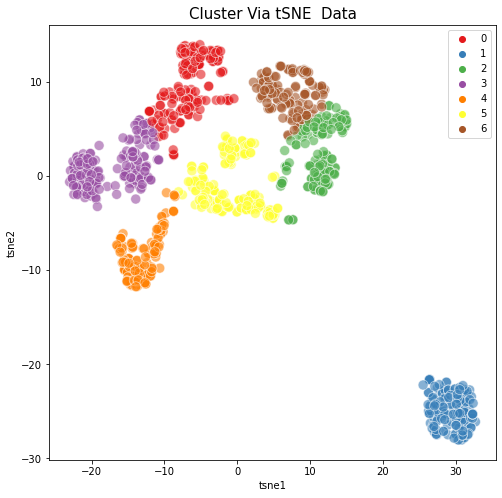

In [199]:
tsne = manifold.TSNE(n_components=2, verbose=0, perplexity=80, n_iter=5000, learning_rate=200)
T = tsne.fit_transform(df_total_tsne)
tsne_df = pd.DataFrame(T, columns=['tsne1', 'tsne2'])

#Clustering kmeans
kmeans = KMeans(n_clusters=7, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
labels = kmeans.labels_
clusters = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels})], axis=1)

#Plotting
plt.figure(figsize = (8,8))
sns.scatterplot(clusters.iloc[:,0],clusters.iloc[:,1],hue=labels, palette='Set1', s=100, alpha=0.6).set_title('Cluster Via tSNE  Data', fontsize=15)
plt.legend()
plt.show()

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


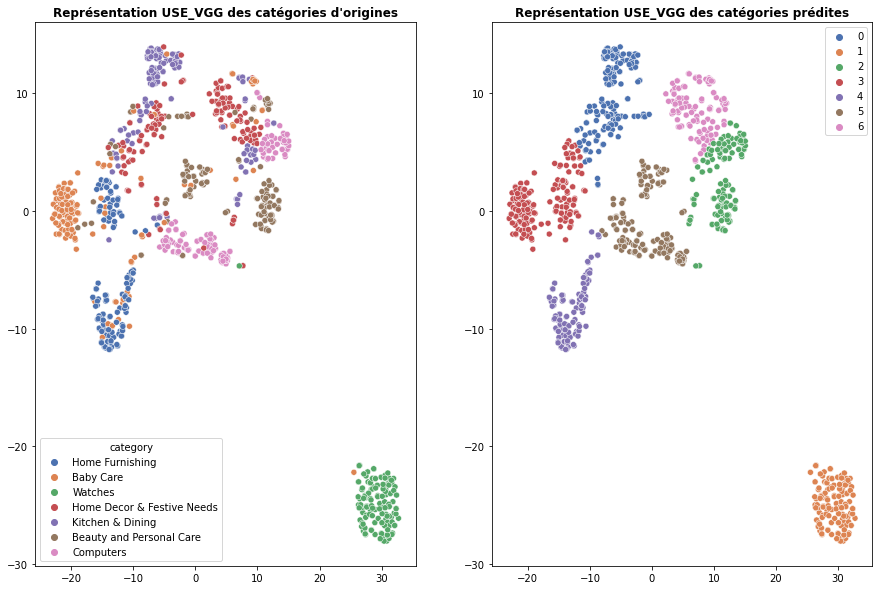

In [200]:
labels_true=data.category

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(T[:,0],T[:,1],hue=labels_true,legend='full', palette='deep')
ax.set_title("Représentation USE_VGG des catégories d'origines", fontweight='bold')

ax = fig.add_subplot(1,2,2)
sns.scatterplot(T[:,0],T[:,1],hue=labels,legend='full', palette='deep')
ax.set_title("Représentation USE_VGG des catégories prédites", fontweight='bold')
plt.show()
use_vgg_km_scores = clusters_scores(T,labels, labels_true, 'use_vgg_Kmeans')


In [201]:
#Metrics ARI
data['cluster_Total'] = labels
categories_true = data['category']
categories_predict = data['cluster_Total']
from sklearn import metrics
ari = metrics.adjusted_rand_score(categories_true, categories_predict)
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(categories_true, categories_predict))

Adjusted Rand Index: 0.427


In [202]:
data.groupby('cluster_Total')['category'].value_counts().to_frame()

category
cluster_Total category                            
0             Kitchen & Dining                  97
              Home Decor & Festive Needs        54
              Beauty and Personal Care          11
              Baby Care                          4
1             Watches                          149
              Baby Care                          1
2             Beauty and Personal Care          63
              Computers                         50
              Kitchen & Dining                  20
              Home Decor & Festive Needs         9
              Baby Care                          2
              Watches                            1
3             Baby Care                         99
              Home Furnishing                   49
              Home Decor & Festive Needs        10
              Kitchen & Dining                  10
              Beauty and Personal Care           7
4             Home Furnishing                   99
              Baby Care                         23
              Beauty and Personal Care           3
5             Computers                         94
              Beauty and Personal Care          48
              Home Decor & Festive Needs         8
              Kitchen & Dining                   7
              Baby Care                          5
              Home Furnishing                    2
6             Home Decor & Festive Needs        69
              Beauty and Personal Care          18
              Baby Care                         16
              Kitchen & Dining                  16
              Computers                          6

In [206]:
#Catégories des différents clusters + Matrice de confusion
data['cluster_Total_label'] = data['cluster_Total']
data['cluster_Total_label'] = data['cluster_Total_label'].replace(0, 'kitchen & dining')
data['cluster_Total_label'] = data['cluster_Total_label'].replace(1, 'watches')
data['cluster_Total_label'] = data['cluster_Total_label'].replace(2, 'Beauty and Personal Care')
data['cluster_Total_label'] = data['cluster_Total_label'].replace(3, 'Baby Care')
data['cluster_Total_label'] = data['cluster_Total_label'].replace(4, 'Home Furnishing')
data['cluster_Total_label'] = data['cluster_Total_label'].replace(5, 'Computers')
data['cluster_Total_label'] = data['cluster_Total_label'].replace(6, 'Home Decor & Festive Needs')
categories_predict = data['cluster_Total_label']
categories_true = data['category']
print('\naccuracy: {}%'.format(round(accuracy_score(categories_predict,categories_true)*100,2)))



accuracy: 40.38%


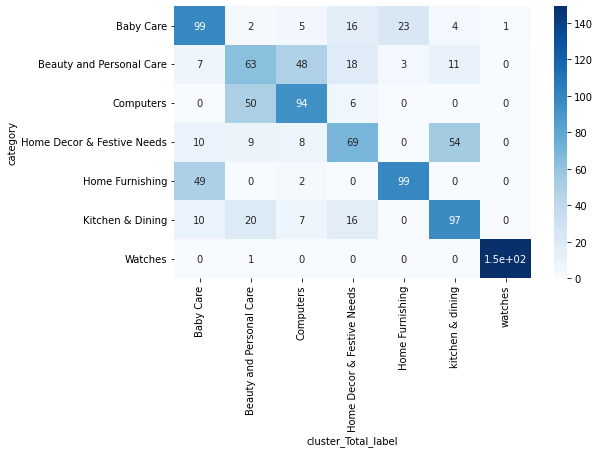

In [207]:
#Catégories des différents clusters + Matrice de confusion
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(categories_true, categories_predict),
            annot=True,
            cmap="Blues")

plt.show()

In [208]:
def plot_erreurs(cat_clust, cat_true, figsize=(8,4),
                palette='tab10', ylim=(0,250), bboxtoanchor=None):
    
    # pivot = data.drop(columns=['description','image'])
    pivot = pd.DataFrame()
    pivot['label']=cat_clust
    pivot['category']=cat_true
    pivot['count']=1
    pivot = pivot.groupby(by=['label','category']).count().unstack().fillna(0)
    pivot.columns=pivot.columns.droplevel()
    
    colors = sns.color_palette(palette, cat_clust.shape[0]).as_hex()
    pivot.plot.bar(width=0.8,stacked=True,legend=True,figsize=figsize,
                   color=colors, ec='k')
    plt.legend(bbox_to_anchor=bboxtoanchor)
        
    plt.show()    
    
    return pivot

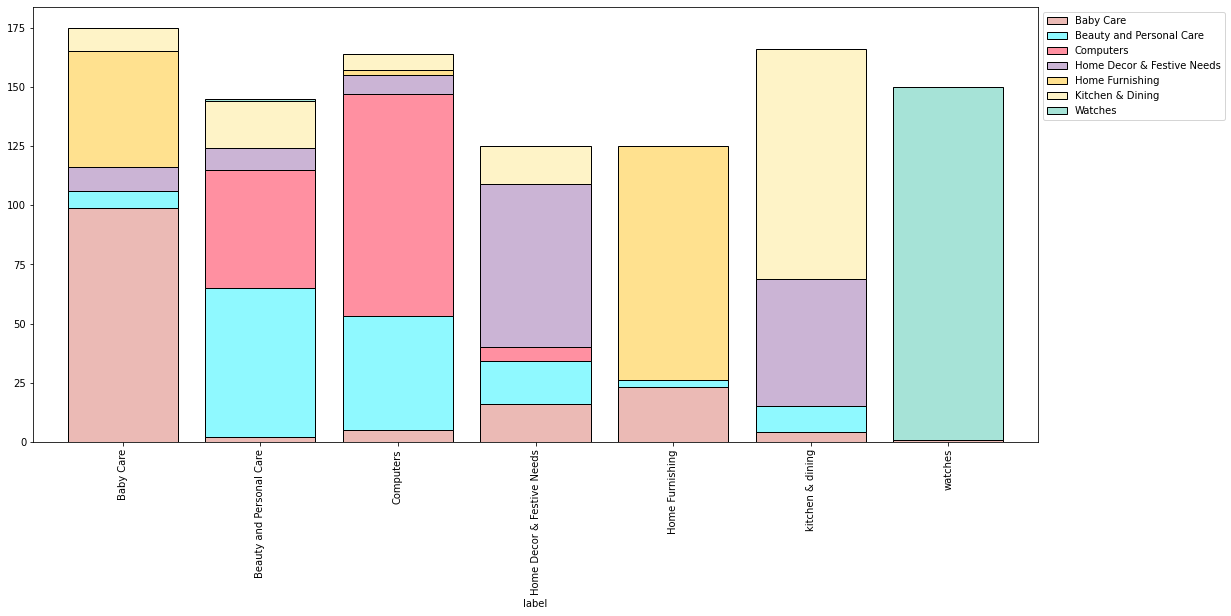

category,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
label,,,,,,,
Baby Care,99.0,7.0,0.0,10.0,49.0,10.0,0.0
Beauty and Personal Care,2.0,63.0,50.0,9.0,0.0,20.0,1.0
Computers,5.0,48.0,94.0,8.0,2.0,7.0,0.0
Home Decor & Festive Needs,16.0,18.0,6.0,69.0,0.0,16.0,0.0
Home Furnishing,23.0,3.0,0.0,0.0,99.0,0.0,0.0
kitchen & dining,4.0,11.0,0.0,54.0,0.0,97.0,0.0
watches,1.0,0.0,0.0,0.0,0.0,0.0,149.0


In [212]:
plot_erreurs(data['cluster_Total_label'],
                              data['category'],
                              palette=['#EBBAB5', '#8FF9FF', '#FF90A1','#CBB4D5', '#FFE18F','#FEF3C7','#A6E3D7'],
                              figsize=(18,8),
                              bboxtoanchor=(1,1), ylim=(0,250))

### recap

In [219]:
recap=pd.concat([scor_fin,use_vgg_km_scores.T],axis=0)

In [220]:
recap

,Homogeneity,Completeness,V_measure,ARI,sil_scor
svd_tf_Kmeans,0.320497,0.193321,0.241170,0.071505,-0.191498
svd_tfidf_Kmeans,0.485696,0.407960,0.443447,0.194402,0.026700
tsne_tf_Kmeans,0.475388,0.465171,0.470224,0.357502,0.455265
tsne_tfidf_Kmeans,0.521351,0.511856,0.516560,0.407434,0.463916
svd_bert_Kmeans,0.441250,0.402347,0.420902,0.237345,0.230811
tsne_bert_Kmeans,0.437335,0.418656,0.427792,0.261455,0.445599
svd_bert_Kmeans,0.437335,0.418656,0.427792,0.261455,0.286302
tsne_use_Kmeans,0.563576,0.555964,0.559744,0.446889,0.461946
lda_tf_Kmeans,0.268048,0.221924,0.242815,0.138938,-0.065553
lda_tfidf_Kmeans,0.189820,0.110981,0.140069,0.076113,-0.015467


In [221]:
recap.sort_values(by='ARI', ascending=False)

,Homogeneity,Completeness,V_measure,ARI,sil_scor
tsne_use_Kmeans,0.563576,0.555964,0.559744,0.446889,0.461946
use_vgg_Kmeans,0.530793,0.528731,0.529760,0.427318,0.033170
tsne_tfidf_Kmeans,0.521351,0.511856,0.516560,0.407434,0.463916
tsne_tf_Kmeans,0.475388,0.465171,0.470224,0.357502,0.455265
VGG16_Clusters,0.429888,0.416773,0.423229,0.297134,0.393393
tsne_bert_Kmeans,0.437335,0.418656,0.427792,0.261455,0.445599
svd_bert_Kmeans,0.437335,0.418656,0.427792,0.261455,0.286302
svd_bert_Kmeans,0.441250,0.402347,0.420902,0.237345,0.230811
nmf_tf_Kmeans,0.493339,0.364508,0.419249,0.201058,0.002471
svd_tfidf_Kmeans,0.485696,0.407960,0.443447,0.194402,0.026700


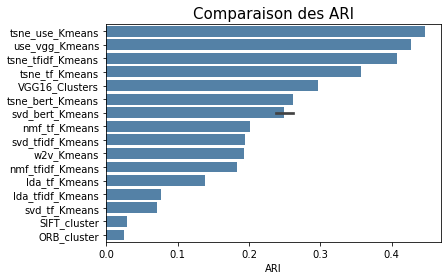

In [227]:
summary=recap.sort_values(by='ARI', ascending=False)
sns.barplot(x=summary['ARI'],y=summary.index, color='SteelBlue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Comparaison des ARI', fontsize=15)
plt.show()